In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from imgaug import augmenters as iaa
from imgaug import parameters as iap
import random
from sklearn.model_selection import train_test_split

In [2]:
X = np.load('beta_simulator_windows\X.npy')
y = np.load('beta_simulator_windows\y.npy')

def augment(img, steering_angle):
    # Flip
    if random.random() > 0.5:
        img = img[:, ::-1, :]
        steering_angle = -steering_angle
    # Blur
    blurer = iaa.GaussianBlur(iap.Uniform(0.1, 1))
    img = blurer.augment_image(img)
    # Shuffle
    sh = iaa.ChannelShuffle(p=0.5)
    img = sh.augment_image(img)
    # Fog
    fog = iaa.Fog()
    img = fog.augment_image(img)
    # Translate
    tx = random.randint(-20,20)
    translator = iaa.Affine(translate_px={"x":tx}, mode='edge')
    img = translator.augment_image(img)
    steering_angle += tx*0.025
    
    return img, steering_angle

In [3]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
Xgen=[]
ygen=[]
for i in range(X_train.shape[0]):
    img, angle = augment(X[i],y[i])
    Xgen.append(img)
    ygen.append(angle)
    
Xgen = np.array(Xgen)
ygen = np.array(ygen)
print(Xgen.shape, ygen.shape)

(20188, 60, 80, 3) (20188,)


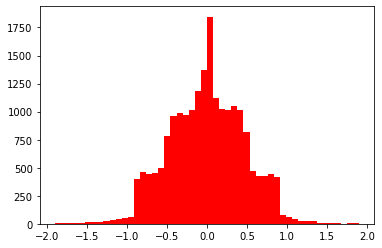

In [5]:
plt.hist(ygen, 50, facecolor='red');

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, Dropout, MaxPooling, Lambda

ModuleNotFoundError: No module named 'keras'

In [ ]:
def myModel(input_shape):
    model = Sequential([
        Lambda(lambda x: (x-128.0)/255.0, input_shape=input_shape, name='normalize'),
        Conv2D(64,(3,3), activation='relu'),
        Conv2D(32,(3,3), activation='relu'),
        Conv2D(16,(3,3), activation='relu'),
        Conv2D(8,(3,3), activation='relu'),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(512, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1)
    ])